In [ ]:
import numpy as np
import pandas

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor

csvFile = pandas.read_csv("yXtrain.csv")

Splitting the dataset between training and testing

In [ ]:
cols = csvFile.columns
##TestTrainSplit##

Y = csvFile[[cols[1]]] #this is the column containing Y
X = csvFile[cols[2:]] #this is the column containing the features/independent variables

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size =0.2) #20% of rows are randomly allotted to the test set


In [ ]:
class MultivariateLinearRegression:
    def __init__(self):
        self.coefficients_ = None
        self.intercept_ = None

    def fit(self, X, y):
        if isinstance(X, np.ndarray):
            ones_column = np.ones((X.shape[0], 1))
            X = np.concatenate((ones_column, X), axis=1) #this is to calculate the offset term
        elif 'pandas' in str(type(X)):
            ones_column = np.ones((X.shape[0], 1))
            X = np.concatenate((ones_column, X.values), axis=1)

        coefficients = np.linalg.inv(X.T @ X) @ X.T @ y

        self.intercept_ = coefficients[0]
        self.coefficients_ = coefficients[1:]

    def predict(self, X):
        if isinstance(X, np.ndarray):
            ones_column = np.ones((X.shape[0], 1))
            X = np.concatenate((ones_column, X), axis=1)
        elif 'pandas' in str(type(X)):
            ones_column = np.ones((X.shape[0], 1))
            X = np.concatenate((ones_column, X.values), axis=1)

        return X @ np.concatenate(([self.intercept_], self.coefficients_))

In [ ]:
def r_squared(y_true, y_pred): #measure of fit
    mean_y_true = np.mean(y_true)
    numerator = np.sum((y_true - y_pred)**2)
    denominator = np.sum((y_true - mean_y_true)**2)

    r_squared = 1 - (numerator / denominator) #maximum value 1
    return(r_squared.mean())

Linear Regression

In [ ]:
linear_model = MultivariateLinearRegression()
x_train_numpy = x_train.to_numpy()
y_train_numpy = y_train.to_numpy()
x_test_numpy = x_test.to_numpy()
y_test_numpy = y_test.to_numpy()

linear_model.fit(x_train_numpy,y_train_numpy)

linear_predictions_train = linear_model.predict(x_train_numpy)
linear_predictions = linear_model.predict(x_test_numpy)

print("Linear Model Coefficients:", linear_model.coefficients_)
print("Linear Model Intercept:", linear_model.intercept_)
print()

linear_mse_train = mean_squared_error(y_train, linear_predictions_train)
linear_mse_test = mean_squared_error(y_test, linear_predictions)
r_squared_train_linear = r_squared(y_train,linear_predictions_train)
r_squared_test_linear = r_squared(y_test,linear_predictions)

print("Linear Model MSE on Train:", linear_mse_train)
print()
print("Linear Model MSE on Test:", linear_mse_test)
print()

print("R-squared Train:", r_squared_train_linear)
print()
print("R-squared Test:", r_squared_test_linear)


Linear Model Coefficients: [[-4.6457914 ]
 [ 4.02557381]
 [-4.45134025]
 [ 3.3631663 ]
 [-3.11630155]
 [ 0.0967903 ]
 [ 0.35084454]
 [-0.12157242]
 [-0.13616384]
 [ 0.14673449]
 [-0.49449494]
 [-0.0600881 ]
 [-0.10247744]
 [-0.09012757]
 [-0.21263939]
 [-0.14487725]
 [ 0.07288057]
 [-0.66575683]
 [ 0.08027456]
 [ 0.23786215]
 [-0.12434683]
 [-0.30499237]
 [-0.17998388]
 [ 0.29862887]
 [ 0.23622418]
 [ 0.25062337]
 [-0.0945364 ]
 [-0.04566266]
 [ 0.49902615]
 [ 0.25925175]
 [-0.27484833]
 [ 0.16065513]
 [-0.1897264 ]
 [-0.38167014]
 [-0.0056318 ]
 [-0.03037552]
 [ 0.4490397 ]
 [-0.09385274]
 [-0.34178469]
 [ 0.64411062]
 [-0.05915726]
 [ 0.14205975]
 [-0.24440731]
 [-0.33981033]
 [ 0.26646776]
 [-0.14566749]
 [ 0.27723428]
 [ 0.25889344]
 [ 0.57058779]
 [-0.19904322]]
Linear Model Intercept: [13.0166818]

Linear Model MSE on Train: 90.40131136325596

Linear Model MSE on Test: 99.87799340585703

R-squared Train: 0.45866786892276656

R-squared Test: 0.40048714864123436


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Calculating residuals

In [ ]:
residuals = y_train - linear_model.predict(x_train)
#print(y_train.shape)
#print(linear_model.predict(x_train).shape)
#print(residuals.shape)
#print()

Neural Network fitting on the residuals

In [ ]:
nn_model = MLPRegressor(hidden_layer_sizes=(5,), max_iter=5000, random_state=42)
nn_model.fit(x_train, residuals.values.ravel())

nn_predictions_train1 = linear_model.predict(x_train) + nn_model.predict(x_train).reshape(-1, 1)
nn_predictions1 = linear_model.predict(x_test) + nn_model.predict(x_test).reshape(-1, 1)

nn_mse_train = mean_squared_error(y_train, nn_predictions_train1)
nn_mse = mean_squared_error(y_test, nn_predictions1)
r_squared_train_nn1 = r_squared(y_train,nn_predictions_train1)
r_squared_test_nn1 = r_squared(y_test,nn_predictions1)

print("Neural Network MSE on Train:", nn_mse_train)
print()
print("Neural Network MSE on Test:", nn_mse)
print()
print("R-squared Train:", r_squared_train_nn1)
print()
print("R-squared Test:", r_squared_test_nn1)

Neural Network MSE on Train: 1.2152512301219978

Neural Network MSE on Test: 1.7307291904947244

R-squared Train: 0.9927229535913175

R-squared Test: 0.9896113812808889


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


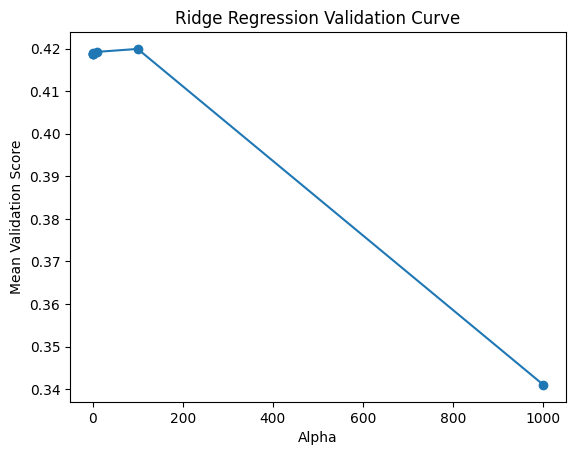

100


In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve
from sklearn.linear_model import Ridge
import math

alphas = [0, 0.01, 0.1, 1, 10, 100, 1000]

ridge_model = Ridge()
train_scores, valid_scores = validation_curve(ridge_model, x_train, y_train, param_name='alpha', param_range=alphas, cv=5)

plt.plot(alphas, np.mean(valid_scores, axis=1), marker='o')
plt.xlabel('Alpha')
plt.ylabel('Mean Validation Score')
plt.title('Ridge Regression Validation Curve')
plt.show()

best_alpha = alphas[np.argmax(np.mean(valid_scores, axis=1))]

print(best_alpha)



Using Ridge regression

In [ ]:
ridge_model = Ridge(best_alpha)
ridge_model.fit(x_train, y_train)
ridge_predictions = ridge_model.predict(x_test)
ridge_predictions_train = ridge_model.predict(x_train)

mse = mean_squared_error(y_test, ridge_predictions)
print(mse)

r_squared_train_ridge = r_squared(y_pred = ridge_predictions_train, y_true = y_train)
r_squared_test_ridge = r_squared(y_pred = ridge_predictions, y_true = y_test)

99.17356122975467


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [ ]:
residuals = y_train - ridge_model.predict(x_train)

In [ ]:
nn_model = MLPRegressor(hidden_layer_sizes=(5,), max_iter=5000, random_state=42)
nn_model.fit(x_train, residuals.values.ravel())

nn_predictions_train2 = ridge_model.predict(x_train) + nn_model.predict(x_train).reshape(-1, 1)
nn_predictions2 = ridge_model.predict(x_test) + nn_model.predict(x_test).reshape(-1, 1)

nn_mse_train = mean_squared_error(y_train, nn_predictions_train2)
nn_mse = mean_squared_error(y_test, nn_predictions2)
r_squared_train_nn2 = r_squared(y_train,nn_predictions_train2)
r_squared_test_nn2 = r_squared(y_test,nn_predictions2)

print("Neural Network MSE on Train:", nn_mse_train)
print()
print("Neural Network MSE on Test:", nn_mse)
print()
print("R-squared Train:", r_squared_train_nn2)
print()
print("R-squared Test:", r_squared_test_nn2)

Neural Network MSE on Train: 0.9021060603516028

Neural Network MSE on Test: 1.4477251188772522

R-squared Train: 0.9945980983157916

R-squared Test: 0.9913100996084798


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
